In [249]:
import pandas as pd
import numpy as np
import os
import re
from math import isclose
import matplotlib.pyplot as plt 
import seaborn as sns 

In [48]:
path_to_csv = '../data/annotations/' #'jsonl/'
# 1st batch
csv_files = [pos_csv for pos_csv in os.listdir(path_to_csv) if (pos_csv.endswith('.csv') and pos_csv.startswith('1st_batch_'))]
csv_files

['1st_batch_annot_7.csv',
 '1st_batch_annot_4.csv',
 '1st_batch_annot_6.csv',
 '1st_batch_annot_1.csv',
 '1st_batch_annot_3.csv',
 '1st_batch_annot_2.csv',
 '1st_batch_annot_5.csv']

In [49]:
data = pd.DataFrame()

for lst in csv_files:
    data_temp_1 = pd.read_csv(f'../data/annotations/{lst}', encoding='utf-8')
    data_temp_1 = pd.DataFrame(data_temp_1)
    data = pd.concat([data, data_temp_1], axis = 0)  

data = data.reset_index(drop=True)

data = data[['uniqueID', 'text', 'label']]

data

,uniqueID,text,label
0,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither
1,antisexm24_uk-3,Disgusted to hear Suella Braverman say there i...,neither
2,antisexm24_uk-6,I have worked with 8 Home Secretaries and I ca...,neither
3,antisexm24_uk-7,I would like to congratulate our next Prime Mi...,neither
4,antisexm24_uk-9,Have I got this right? Liz Truss is intending ...,neither
...,...,...,...
709,antisexm24_uk-223,BREAKING: Matt Hancock and Priti Patel have ex...,neither
710,antisexm24_uk-224,0.13% of the population voted for Liz Truss. B...,neither
711,antisexm24_uk-233,He stood by Boris Johnson till the bitter end ...,neither
712,antisexm24_uk-235,"""Multiple breaches"" by Suella Braverman accord...",neither


In [50]:
# Group each individual labels together per entry
data_label =data.groupby(['uniqueID'])['label'].agg(', '.join).apply(pd.Series).reset_index().rename(columns={0: 'labels'})

data_label[['label 1', 'label 2', 'label 3']] = data_label['labels'].str.split(', ', expand=True)
data_label = data_label.drop(columns='labels')

data_label = data_label.sort_values(by='uniqueID')

data_label

,uniqueID,label 1,label 2,label 3
0,antisexm24_uk-0,neither,neither,sexism
1,antisexm24_uk-1,neither,neither,neither
2,antisexm24_uk-10,neither,neither,neither
3,antisexm24_uk-100,neither,neither,neither
4,antisexm24_uk-101,neither,neither,neither
...,...,...,...,...
233,antisexm24_uk-95,neither,neither,neither
234,antisexm24_uk-96,neither,anti-sexism,anti-sexism
235,antisexm24_uk-97,neither,neither,anti-sexism
236,antisexm24_uk-98,neither,sexism,neither


In [51]:
data = data.drop(columns='label')
data = data.drop_duplicates(subset='uniqueID')

data = data.sort_values(by='uniqueID')

data

,uniqueID,text
407,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...
0,antisexm24_uk-1,"General Election please! 81,000 Tory members v..."
304,antisexm24_uk-10,If you think you are having a tough day spare ...
46,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free..."
136,antisexm24_uk-101,@pritipatel This is not about the location of ...
...,...,...
41,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...
42,antisexm24_uk-96,Dear @CommonsSpeaker were you awake at #PMQs t...
43,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do..."
44,antisexm24_uk-98,Priti Patel and Liz Truss are in posts at leas...


In [52]:
data = pd.merge(data, data_label, on="uniqueID", how="left")

#data = data.drop_duplicates(subset='uniqueID')
data

,uniqueID,text,label 1,label 2,label 3
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,neither,neither,sexism
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,neither,neither
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,neither,neither
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,neither,neither
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither,neither,neither
...,...,...,...,...,...
233,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...,neither,neither,neither
234,antisexm24_uk-96,Dear @CommonsSpeaker were you awake at #PMQs t...,neither,anti-sexism,anti-sexism
235,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do...",neither,neither,anti-sexism
236,antisexm24_uk-98,Priti Patel and Liz Truss are in posts at leas...,neither,sexism,neither


In [53]:
#data = data.set_index('uniqueID')
rep = {'sexism':1, 'anti-sexism':-1, 'neither':0}
data[['label 1', 'label 2', 'label 3']] = data[['label 1', 'label 2', 'label 3']].replace(rep)

data

/tmp/ipykernel_1088969/1000578878.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[['label 1', 'label 2', 'label 3']] = data[['label 1', 'label 2', 'label 3']].replace(rep)


,uniqueID,text,label 1,label 2,label 3
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,0,0,1
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",0,0,0
2,antisexm24_uk-10,If you think you are having a tough day spare ...,0,0,0
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",0,0,0
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,0,0,0
...,...,...,...,...,...
233,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...,0,0,0
234,antisexm24_uk-96,Dear @CommonsSpeaker were you awake at #PMQs t...,0,-1,-1
235,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do...",0,0,-1
236,antisexm24_uk-98,Priti Patel and Liz Truss are in posts at leas...,0,1,0


In [54]:
#data.to_csv('../data/nonagr/1st_batch.csv')

In [55]:
data = data.assign(label=np.where(data[['label 1', 'label 2', 'label 3']].sum(axis=1) > 0,'sexism',np.where(data[['label 1', 'label 2', 'label 3']].sum(axis=1) < 0, 'anti-sexism', 'neither')))
data

,uniqueID,text,label 1,label 2,label 3,label
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,0,0,1,sexism
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",0,0,0,neither
2,antisexm24_uk-10,If you think you are having a tough day spare ...,0,0,0,neither
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",0,0,0,neither
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,0,0,0,neither
...,...,...,...,...,...,...
233,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...,0,0,0,neither
234,antisexm24_uk-96,Dear @CommonsSpeaker were you awake at #PMQs t...,0,-1,-1,anti-sexism
235,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do...",0,0,-1,anti-sexism
236,antisexm24_uk-98,Priti Patel and Liz Truss are in posts at leas...,0,1,0,sexism


In [56]:
data_copy = data.copy()
data_copy = data_copy.drop(columns='label')
data_copy = data_copy.assign(label=np.where(data[['label 1', 'label 2', 'label 3']].sum(axis=1) > 1,'sexism',np.where(data[['label 1', 'label 2', 'label 3']].sum(axis=1) < -1, 'anti-sexism', 'neither')))

data_copy

,uniqueID,text,label 1,label 2,label 3,label
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,0,0,1,neither
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",0,0,0,neither
2,antisexm24_uk-10,If you think you are having a tough day spare ...,0,0,0,neither
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",0,0,0,neither
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,0,0,0,neither
...,...,...,...,...,...,...
233,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...,0,0,0,neither
234,antisexm24_uk-96,Dear @CommonsSpeaker were you awake at #PMQs t...,0,-1,-1,anti-sexism
235,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do...",0,0,-1,neither
236,antisexm24_uk-98,Priti Patel and Liz Truss are in posts at leas...,0,1,0,neither


In [57]:
data['label'].compare(data_copy['label']).value_counts()

self         other  
sexism       neither    16
anti-sexism  neither    10
Name: count, dtype: int64

In [58]:
data['label'].value_counts(), data_copy['label'].value_counts()

(label
 neither        201
 sexism          20
 anti-sexism     17
 Name: count, dtype: int64,
 label
 neither        227
 anti-sexism      7
 sexism           4
 Name: count, dtype: int64)

In [59]:
data = data[['uniqueID', 'text', 'label']]
data


,uniqueID,text,label
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither
...,...,...,...
233,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...,neither
234,antisexm24_uk-96,Dear @CommonsSpeaker were you awake at #PMQs t...,anti-sexism
235,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do...",anti-sexism
236,antisexm24_uk-98,Priti Patel and Liz Truss are in posts at leas...,sexism


In [172]:
#data.to_csv('../data/batches/1st_batch_data.csv')

In [60]:
full_df = pd.read_csv('../data/orig/metadata_full_dataset.csv')

full_df = full_df[['uniqueID', 'created_at']]

full_df

,uniqueID,created_at
0,antisexm24_uk-0,2022-10-25
1,antisexm24_uk-1,2022-09-06
2,antisexm24_uk-2,2022-10-25
3,antisexm24_uk-3,2022-10-31
4,antisexm24_uk-4,2022-10-24
...,...,...
115186,antisexm24_uk-115186,2022-09-06
115187,antisexm24_uk-115187,2022-02-25
115188,antisexm24_uk-115188,2022-09-04
115189,antisexm24_uk-115189,2022-10-26


In [80]:
date_df = pd.merge(data, full_df, on='uniqueID', how='left')
date_df

,uniqueID,text,label,created_at
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism,2022-10-25
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,2022-09-06
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,2022-09-06
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,2022-09-05
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither,2022-02-26
...,...,...,...,...
233,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...,neither,2022-10-30
234,antisexm24_uk-96,Dear @CommonsSpeaker were you awake at #PMQs t...,anti-sexism,2022-02-23
235,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do...",anti-sexism,2022-09-07
236,antisexm24_uk-98,Priti Patel and Liz Truss are in posts at leas...,sexism,2022-02-28


In [81]:
date_df['created_at'].value_counts()

created_at
2022-09-05    32
2022-10-31    23
2022-09-06    21
2022-10-25    21
2022-09-07    15
2022-10-26    15
2022-10-30    11
2022-10-27     8
2022-10-24     7
2022-02-23     7
2022-04-19     6
2022-05-11     5
2022-10-29     5
2022-02-28     5
2022-02-27     4
2022-02-10     4
2022-02-25     4
2022-02-26     4
2022-03-17     4
2022-09-04     3
2022-05-12     3
2022-05-10     3
2022-04-20     2
2022-09-02     2
2022-02-24     2
2022-04-30     2
2022-03-21     2
2022-04-21     2
2022-10-28     2
2022-04-18     2
2022-04-22     1
2022-03-16     1
2022-04-28     1
2022-04-16     1
2022-02-11     1
2022-04-29     1
2022-09-03     1
2022-02-22     1
2022-04-15     1
2022-04-25     1
2022-03-15     1
2022-05-13     1
Name: count, dtype: int64

In [82]:
type(date_df['created_at'].iloc[0])

str

In [83]:
date_df['trigger_event'] = 'sexist'
date_df['trigger_event'] = np.where(date_df['created_at'].str.startswith('2022-09'), 'political', date_df['trigger_event'])
date_df['trigger_event'] = np.where(date_df['created_at'].str.startswith('2022-10'), 'normal', date_df['trigger_event'])

date_df['trigger_event']

0         normal
1      political
2      political
3      political
4         sexist
         ...    
233       normal
234       sexist
235    political
236       sexist
237       normal
Name: trigger_event, Length: 238, dtype: object

In [84]:
date_df

,uniqueID,text,label,created_at,trigger_event
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism,2022-10-25,normal
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,2022-09-06,political
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,2022-09-06,political
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,2022-09-05,political
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither,2022-02-26,sexist
...,...,...,...,...,...
233,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...,neither,2022-10-30,normal
234,antisexm24_uk-96,Dear @CommonsSpeaker were you awake at #PMQs t...,anti-sexism,2022-02-23,sexist
235,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do...",anti-sexism,2022-09-07,political
236,antisexm24_uk-98,Priti Patel and Liz Truss are in posts at leas...,sexism,2022-02-28,sexist


In [66]:
#date_df = date_df[date_df['trigger_event'] != 'sexist']
#date_df

,uniqueID,text,label,created_at,trigger_event
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism,2022-10-25,normal
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,2022-09-06,political
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,2022-09-06,political
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,2022-09-05,political
6,antisexm24_uk-103,I hear the French press have properly taken th...,neither,2022-09-06,political
...,...,...,...,...,...
231,antisexm24_uk-93,I am told by a Home Office source that civil s...,neither,2022-09-07,political
232,antisexm24_uk-94,"So Suella Braverman, who wants to make cannabi...",neither,2022-10-25,normal
233,antisexm24_uk-95,:eyes:Boris Johnson and Simon Case suppressed ...,neither,2022-10-30,normal
235,antisexm24_uk-97,"I do not care if Liz Truss had an affair, I do...",anti-sexism,2022-09-07,political


In [67]:
#date_df = date_df[['trigger_event', 'text', 'label']]
#date_df

,trigger_event,text,label
0,normal,The rise of Suella Braverman is one of the gen...,sexism
1,political,"General Election please! 81,000 Tory members v...",neither
2,political,If you think you are having a tough day spare ...,neither
3,political,"Already it seems Liz Truss"" ""energy price free...",neither
6,political,I hear the French press have properly taken th...,neither
...,...,...,...
231,political,I am told by a Home Office source that civil s...,neither
232,normal,"So Suella Braverman, who wants to make cannabi...",neither
233,normal,:eyes:Boris Johnson and Simon Case suppressed ...,neither
235,political,"I do not care if Liz Truss had an affair, I do...",anti-sexism


2nd batch

In [85]:
path_to_csv = '../data/annotations/' #'jsonl/'
# 1st batch
csv_files = [pos_csv for pos_csv in os.listdir(path_to_csv) if (pos_csv.endswith('.csv') and pos_csv.startswith('2nd_batch_'))]
csv_files

['2nd_batch_annot_5.csv',
 '2nd_batch_annot_1.csv',
 '2nd_batch_annot_7.csv',
 '2nd_batch_annot_4.csv',
 '2nd_batch_annot_6.csv',
 '2nd_batch_annot_8.csv',
 '2nd_batch_annot_2.csv',
 '2nd_batch_annot_3.csv']

In [86]:
data1 = pd.DataFrame()

for lst in csv_files:
    data_temp_1 = pd.read_csv(f'../data/annotations/{lst}', encoding='utf-8')
    data_temp_1 = pd.DataFrame(data_temp_1)
    data1 = pd.concat([data1, data_temp_1], axis = 0)  

data1 = data1.reset_index(drop=True)

data1 = data1[['uniqueID', 'text', 'label']]

data1

,uniqueID,text,label
0,antisexm24_uk-238,if the Daily Mail thinks its outrageous that K...,neither
1,antisexm24_uk-242,I admit I have still not come to terms with th...,neither
2,antisexm24_uk-244,:collision:Suella Braverman accused of ignorin...,neither
3,antisexm24_uk-256,Congratulations to Liz Truss. I hope she stand...,neither
4,antisexm24_uk-257,BREAKING: Just a matter of hours after the res...,neither
...,...,...,...
811,antisexm24_uk-505,The abundance of integrity shown by @Keir_Star...,neither
812,antisexm24_uk-506,@trussliz @Telegraph Sigh. That is what your p...,neither
813,antisexm24_uk-507,Beyond belief that Liz Truss is threatening a ...,neither
814,antisexm24_uk-508,.@SuellaBraverman MP [Sue-Ellen Fernandes] was...,neither


In [87]:
data1['label'].isna().value_counts()

label
False    816
Name: count, dtype: int64

In [88]:
# Group each individual labels together per entry
data_label = data1.groupby(['uniqueID'])['label'].agg(', '.join).apply(pd.Series).reset_index().rename(columns={0: 'labels'})

data_label[['label 1', 'label 2', 'label 3']] = data_label['labels'].str.split(', ', expand=True)
data_label = data_label.drop(columns='labels')

data_label = data_label.sort_values(by='uniqueID')

data_label

,uniqueID,label 1,label 2,label 3
0,antisexm24_uk-238,neither,neither,neither
1,antisexm24_uk-239,neither,neither,neither
2,antisexm24_uk-240,neither,neither,neither
3,antisexm24_uk-241,neither,neither,sexism
4,antisexm24_uk-242,neither,neither,neither
...,...,...,...,...
267,antisexm24_uk-505,neither,neither,neither
268,antisexm24_uk-506,neither,neither,neither
269,antisexm24_uk-507,neither,neither,neither
270,antisexm24_uk-508,neither,neither,neither


In [89]:
data1 = data1.drop(columns='label')
data1 = data1.drop_duplicates(subset='uniqueID')

data1 = data1.sort_values(by='uniqueID')

data1 = pd.merge(data1, data_label, on="uniqueID", how="left")

data1

,uniqueID,text,label 1,label 2,label 3
0,antisexm24_uk-238,if the Daily Mail thinks its outrageous that K...,neither,neither,neither
1,antisexm24_uk-239,BREAKING: As foreign-born criminal Boris Johns...,neither,neither,neither
2,antisexm24_uk-240,"As I said recently, Suella Braverman is absolu...",neither,neither,neither
3,antisexm24_uk-241,Liz Truss might want to give it a few days bef...,neither,neither,sexism
4,antisexm24_uk-242,I admit I have still not come to terms with th...,neither,neither,neither
...,...,...,...,...,...
267,antisexm24_uk-505,The abundance of integrity shown by @Keir_Star...,neither,neither,neither
268,antisexm24_uk-506,@trussliz @Telegraph Sigh. That is what your p...,neither,neither,neither
269,antisexm24_uk-507,Beyond belief that Liz Truss is threatening a ...,neither,neither,neither
270,antisexm24_uk-508,.@SuellaBraverman MP [Sue-Ellen Fernandes] was...,neither,neither,neither


In [90]:
data1['label 1'].value_counts(), data1['label 2'].value_counts(), data1['label 3'].value_counts()

(label 1
 neither        245
 anti-sexism     15
 sexism          12
 Name: count, dtype: int64,
 label 2
 neither        252
 sexism          12
 anti-sexism      8
 Name: count, dtype: int64,
 label 3
 neither        235
 sexism          23
 antisexism      10
 anti-sexism      4
 Name: count, dtype: int64)

In [91]:
data1[['label 1', 'label 2', 'label 3']] = data1[['label 1', 'label 2', 'label 3']].replace({'anti-sexism': 'antisexism'}) # in case it is needed

In [92]:
rep = {'sexism':1, 'antisexism':-1, 'neither':0}
data1[['label 1', 'label 2', 'label 3']] = data1[['label 1', 'label 2', 'label 3']].replace(rep)

data1 = data1.assign(label=np.where(data1[['label 1', 'label 2', 'label 3']].sum(axis=1) > 0,'sexism',np.where(data1[['label 1', 'label 2', 'label 3']].sum(axis=1) < 0, 'anti-sexism', 'neither')))
data1

/tmp/ipykernel_1088969/1355426579.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1[['label 1', 'label 2', 'label 3']] = data1[['label 1', 'label 2', 'label 3']].replace(rep)


,uniqueID,text,label 1,label 2,label 3,label
0,antisexm24_uk-238,if the Daily Mail thinks its outrageous that K...,0,0,0,neither
1,antisexm24_uk-239,BREAKING: As foreign-born criminal Boris Johns...,0,0,0,neither
2,antisexm24_uk-240,"As I said recently, Suella Braverman is absolu...",0,0,0,neither
3,antisexm24_uk-241,Liz Truss might want to give it a few days bef...,0,0,1,sexism
4,antisexm24_uk-242,I admit I have still not come to terms with th...,0,0,0,neither
...,...,...,...,...,...,...
267,antisexm24_uk-505,The abundance of integrity shown by @Keir_Star...,0,0,0,neither
268,antisexm24_uk-506,@trussliz @Telegraph Sigh. That is what your p...,0,0,0,neither
269,antisexm24_uk-507,Beyond belief that Liz Truss is threatening a ...,0,0,0,neither
270,antisexm24_uk-508,.@SuellaBraverman MP [Sue-Ellen Fernandes] was...,0,0,0,neither


In [93]:
data1 = data1[['uniqueID', 'text', 'label']]
data1

,uniqueID,text,label
0,antisexm24_uk-238,if the Daily Mail thinks its outrageous that K...,neither
1,antisexm24_uk-239,BREAKING: As foreign-born criminal Boris Johns...,neither
2,antisexm24_uk-240,"As I said recently, Suella Braverman is absolu...",neither
3,antisexm24_uk-241,Liz Truss might want to give it a few days bef...,sexism
4,antisexm24_uk-242,I admit I have still not come to terms with th...,neither
...,...,...,...
267,antisexm24_uk-505,The abundance of integrity shown by @Keir_Star...,neither
268,antisexm24_uk-506,@trussliz @Telegraph Sigh. That is what your p...,neither
269,antisexm24_uk-507,Beyond belief that Liz Truss is threatening a ...,neither
270,antisexm24_uk-508,.@SuellaBraverman MP [Sue-Ellen Fernandes] was...,neither


In [101]:
date_df1 = pd.merge(data1, full_df, on='uniqueID', how='left')
date_df1

,uniqueID,text,label,created_at
0,antisexm24_uk-238,if the Daily Mail thinks its outrageous that K...,neither,2022-04-30
1,antisexm24_uk-239,BREAKING: As foreign-born criminal Boris Johns...,neither,2022-04-22
2,antisexm24_uk-240,"As I said recently, Suella Braverman is absolu...",neither,2022-10-26
3,antisexm24_uk-241,Liz Truss might want to give it a few days bef...,sexism,2022-09-06
4,antisexm24_uk-242,I admit I have still not come to terms with th...,neither,2022-04-29
...,...,...,...,...
267,antisexm24_uk-505,The abundance of integrity shown by @Keir_Star...,neither,2022-05-09
268,antisexm24_uk-506,@trussliz @Telegraph Sigh. That is what your p...,neither,2022-09-04
269,antisexm24_uk-507,Beyond belief that Liz Truss is threatening a ...,neither,2022-03-19
270,antisexm24_uk-508,.@SuellaBraverman MP [Sue-Ellen Fernandes] was...,neither,2022-10-26


In [102]:
date_df1['created_at'].value_counts()

created_at
2022-10-31    32
2022-09-05    31
2022-10-25    25
2022-09-06    25
2022-10-27    13
2022-10-30    13
2022-10-26    12
2022-09-07    11
2022-04-30     8
2022-09-04     8
2022-02-10     8
2022-02-26     7
2022-05-12     6
2022-02-23     5
2022-10-29     4
2022-04-27     4
2022-02-28     4
2022-03-19     4
2022-04-19     3
2022-10-24     3
2022-03-16     3
2022-04-26     3
2022-02-27     3
2022-04-18     3
2022-04-29     2
2022-05-09     2
2022-05-11     2
2022-09-03     2
2022-04-20     2
2022-02-24     2
2022-02-12     2
2022-04-24     2
2022-10-28     2
2022-04-17     1
2022-05-10     1
2022-04-22     1
2022-04-16     1
2022-02-13     1
2022-05-08     1
2022-03-21     1
2022-04-21     1
2022-04-15     1
2022-03-18     1
2022-02-11     1
2022-02-08     1
2022-05-13     1
2022-09-02     1
2022-03-20     1
2022-03-22     1
Name: count, dtype: int64

In [103]:
date_df1['trigger_event'] = 'sexist'
date_df1['trigger_event'] = np.where(date_df1['created_at'].str.startswith('2022-09'), 'political', date_df1['trigger_event'])
date_df1['trigger_event'] = np.where(date_df1['created_at'].str.startswith('2022-10'), 'normal', date_df1['trigger_event'])

date_df1['trigger_event']

0         sexist
1         sexist
2         normal
3      political
4         sexist
         ...    
267       sexist
268    political
269       sexist
270       normal
271    political
Name: trigger_event, Length: 272, dtype: object

In [104]:
date_df1

,uniqueID,text,label,created_at,trigger_event
0,antisexm24_uk-238,if the Daily Mail thinks its outrageous that K...,neither,2022-04-30,sexist
1,antisexm24_uk-239,BREAKING: As foreign-born criminal Boris Johns...,neither,2022-04-22,sexist
2,antisexm24_uk-240,"As I said recently, Suella Braverman is absolu...",neither,2022-10-26,normal
3,antisexm24_uk-241,Liz Truss might want to give it a few days bef...,sexism,2022-09-06,political
4,antisexm24_uk-242,I admit I have still not come to terms with th...,neither,2022-04-29,sexist
...,...,...,...,...,...
267,antisexm24_uk-505,The abundance of integrity shown by @Keir_Star...,neither,2022-05-09,sexist
268,antisexm24_uk-506,@trussliz @Telegraph Sigh. That is what your p...,neither,2022-09-04,political
269,antisexm24_uk-507,Beyond belief that Liz Truss is threatening a ...,neither,2022-03-19,sexist
270,antisexm24_uk-508,.@SuellaBraverman MP [Sue-Ellen Fernandes] was...,neither,2022-10-26,normal


In [ ]:
#date_df1 = date_df1[['trigger_event', 'text', 'label']]
#date_df1

In [106]:
#date_df1.to_csv('../data/batches/2nd_batch_data.csv')

In [107]:
total_df = pd.concat([date_df, date_df1], axis=0)
total_df

,uniqueID,text,label,created_at,trigger_event
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism,2022-10-25,normal
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,2022-09-06,political
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,2022-09-06,political
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,2022-09-05,political
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither,2022-02-26,sexist
...,...,...,...,...,...
267,antisexm24_uk-505,The abundance of integrity shown by @Keir_Star...,neither,2022-05-09,sexist
268,antisexm24_uk-506,@trussliz @Telegraph Sigh. That is what your p...,neither,2022-09-04,political
269,antisexm24_uk-507,Beyond belief that Liz Truss is threatening a ...,neither,2022-03-19,sexist
270,antisexm24_uk-508,.@SuellaBraverman MP [Sue-Ellen Fernandes] was...,neither,2022-10-26,normal


In [108]:
another_df = pd.read_csv('../data/batches/labeled_data_1.csv')
another_df = pd.merge(another_df, full_df, on='uniqueID', how='left')
another_df

,Unnamed: 0,uniqueID,text,label,created_at
0,0,antisexm24_uk-767,"The Durham ""beergate"" affair is becoming more ...",neither,2022-04-25
1,1,antisexm24_uk-4902,"""She calls them utter scum, which is the filth...",neither,2022-02-22
2,2,antisexm24_uk-7085,They will not stand up. Until whichever malici...,neither,2022-05-11
3,3,antisexm24_uk-8674,Suella Braverman has entered Number 10. It is ...,neither,2022-09-06
4,4,antisexm24_uk-16369,"""Somebody sent me the screenshot of it on Twit...",neither,2022-02-27
5,5,antisexm24_uk-17619,"I totally get the Angela Rayner thing, I mean ...",sexism,2022-02-22
6,6,antisexm24_uk-18904,@errjustsaying @LadyRebecca_1 I am absolutely ...,neither,2022-04-25
7,7,antisexm24_uk-19203,Bit weird how tories boast of having given us ...,anti-sexism,2022-02-27
8,8,antisexm24_uk-23680,@AngelaRayner @LiseMcNally @GranadaReports May...,sexism,2022-02-08
9,9,antisexm24_uk-24072,@AliBarry25 @jessphillips Good point. No menti...,neither,2022-02-14


In [109]:
total_df = pd.concat([total_df, another_df], axis=0)
total_df

,uniqueID,text,label,created_at,trigger_event,Unnamed: 0
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism,2022-10-25,normal,NaN
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,2022-09-06,political,NaN
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,2022-09-06,political,NaN
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,2022-09-05,political,NaN
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither,2022-02-26,sexist,NaN
...,...,...,...,...,...,...
39,antisexm24_uk-90666,@CaroleA_Smith @scorelog @boojune1954 @DoreenH...,neither,2022-09-05,NaN,39.0
40,antisexm24_uk-90843,She has NOTHING on Braverman. Nothing. Suella ...,sexism,2022-02-10,NaN,40.0
41,antisexm24_uk-91882,@JeremyCliffe He obviously was not watching Su...,neither,2022-02-10,NaN,41.0
42,antisexm24_uk-91925,@atticrahman @SuellaBraverman Rejoicing in the...,neither,2022-10-30,NaN,42.0


In [110]:
total_df = total_df[['uniqueID', 'text', 'label', 'created_at']]
total_df

,uniqueID,text,label,created_at
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism,2022-10-25
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,2022-09-06
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,2022-09-06
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,2022-09-05
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither,2022-02-26
...,...,...,...,...
39,antisexm24_uk-90666,@CaroleA_Smith @scorelog @boojune1954 @DoreenH...,neither,2022-09-05
40,antisexm24_uk-90843,She has NOTHING on Braverman. Nothing. Suella ...,sexism,2022-02-10
41,antisexm24_uk-91882,@JeremyCliffe He obviously was not watching Su...,neither,2022-02-10
42,antisexm24_uk-91925,@atticrahman @SuellaBraverman Rejoicing in the...,neither,2022-10-30


In [144]:
other_df = pd.read_csv(f'../data/pilot/combined_data.csv', encoding='utf-8')
other_df = other_df[~other_df['created_at'].isna()]
other_df = other_df[['text', 'label', 'created_at']]
other_df

,text,label,created_at
100,She has NOTHING on Braverman. Nothing. \n\nSue...,sexism,06/09/2022
101,@10DowningStreet @SuellaBraverman @ukhomeoffic...,neither,06/09/2022
102,@_TheGMan @benandjerrysUK @SuellaBraverman Goo...,neither,06/09/2022
103,@Jerry_grey2002 @drmikechao @TsarKastik But I ...,neither,06/09/2022
104,@10DowningStreet @SuellaBraverman @ukhomeoffic...,neither,06/09/2022
...,...,...,...
895,Boris Johnson visited Gigg Lane stadium today....,neither,25/04/2022
896,@EmilyThornberry @PETAUK This at labour wonâ...,neither,25/04/2022
897,Queen ð @AngelaRayner https://t.co/7HDiEHy3sJ,neither,25/04/2022
898,UK Prime Minister Boris Johnson lashed out at ...,neither,25/04/2022


In [145]:
type(other_df['created_at'].iloc[0])

str

In [146]:
index_to_remove = other_df[other_df['text'].isin(total_df['text']) == True].index.to_list()

In [147]:
other_df = other_df.drop(index = index_to_remove,axis=1).reset_index(drop=True)
other_df

,text,label,created_at
0,She has NOTHING on Braverman. Nothing. \n\nSue...,sexism,06/09/2022
1,@10DowningStreet @SuellaBraverman @ukhomeoffic...,neither,06/09/2022
2,@_TheGMan @benandjerrysUK @SuellaBraverman Goo...,neither,06/09/2022
3,@Jerry_grey2002 @drmikechao @TsarKastik But I ...,neither,06/09/2022
4,@10DowningStreet @SuellaBraverman @ukhomeoffic...,neither,06/09/2022
...,...,...,...
784,Boris Johnson visited Gigg Lane stadium today....,neither,25/04/2022
785,@EmilyThornberry @PETAUK This at labour wonâ...,neither,25/04/2022
786,Queen ð @AngelaRayner https://t.co/7HDiEHy3sJ,neither,25/04/2022
787,UK Prime Minister Boris Johnson lashed out at ...,neither,25/04/2022


In [148]:
other_df['uniqueID'] = other_df.index
other_df['uniqueID'] = 'antisexm24_uk_pilot-' + other_df['uniqueID'].astype(str)

In [149]:
other_df = other_df[['uniqueID', 'text', 'label', 'created_at']]
other_df

,uniqueID,text,label,created_at
0,antisexm24_uk_pilot-0,She has NOTHING on Braverman. Nothing. \n\nSue...,sexism,06/09/2022
1,antisexm24_uk_pilot-1,@10DowningStreet @SuellaBraverman @ukhomeoffic...,neither,06/09/2022
2,antisexm24_uk_pilot-2,@_TheGMan @benandjerrysUK @SuellaBraverman Goo...,neither,06/09/2022
3,antisexm24_uk_pilot-3,@Jerry_grey2002 @drmikechao @TsarKastik But I ...,neither,06/09/2022
4,antisexm24_uk_pilot-4,@10DowningStreet @SuellaBraverman @ukhomeoffic...,neither,06/09/2022
...,...,...,...,...
784,antisexm24_uk_pilot-784,Boris Johnson visited Gigg Lane stadium today....,neither,25/04/2022
785,antisexm24_uk_pilot-785,@EmilyThornberry @PETAUK This at labour wonâ...,neither,25/04/2022
786,antisexm24_uk_pilot-786,Queen ð @AngelaRayner https://t.co/7HDiEHy3sJ,neither,25/04/2022
787,antisexm24_uk_pilot-787,UK Prime Minister Boris Johnson lashed out at ...,neither,25/04/2022


In [150]:
total_df = pd.concat([total_df, other_df], axis=0)
total_df

,uniqueID,text,label,created_at,month
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism,2022-10-25,October
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,2022-09-06,September
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,2022-09-06,September
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,2022-09-05,September
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither,2022-02-26,February
...,...,...,...,...,...
784,antisexm24_uk_pilot-784,Boris Johnson visited Gigg Lane stadium today....,neither,25/04/2022,NaN
785,antisexm24_uk_pilot-785,@EmilyThornberry @PETAUK This at labour wonâ...,neither,25/04/2022,NaN
786,antisexm24_uk_pilot-786,Queen ð @AngelaRayner https://t.co/7HDiEHy3sJ,neither,25/04/2022,NaN
787,antisexm24_uk_pilot-787,UK Prime Minister Boris Johnson lashed out at ...,neither,25/04/2022,NaN


In [151]:
total_df['created_at'].value_counts()

created_at
25/04/2022    396
25/10/2022    199
06/09/2022    194
2022-09-05     66
2022-10-31     56
2022-09-06     49
2022-10-25     48
2022-10-26     28
2022-09-07     26
2022-10-30     25
2022-10-27     22
2022-02-10     15
2022-02-23     12
2022-02-28     11
2022-02-26     11
2022-09-04     11
2022-04-30     10
2022-04-19     10
2022-10-24     10
2022-10-29      9
2022-05-12      9
2022-02-27      9
2022-05-11      8
2022-03-16      7
2022-04-25      6
2022-02-24      5
2022-02-25      5
2022-04-18      5
2022-10-28      5
2022-04-27      4
2022-03-19      4
2022-03-17      4
2022-05-10      4
2022-04-20      4
2022-04-29      4
2022-09-03      4
2022-04-21      4
2022-04-15      3
2022-09-02      3
2022-03-21      3
2022-02-22      3
2022-04-26      3
2022-04-28      2
2022-04-22      2
2022-03-18      2
2022-02-08      2
2022-05-13      2
2022-02-11      2
2022-04-16      2
2022-02-12      2
2022-04-24      2
2022-05-08      2
2022-05-09      2
2022-03-15      1
2022-04-17      1

In [152]:
def month_assignment(date):
    if date.startswith('2022-10') or date.endswith('10/2022'):
        result = 'October'
    elif date.startswith('2022-11') or date.endswith('11/2022'):
        result = 'November'
    elif date.startswith('2022-09') or date.endswith('09/2022'):
        result = 'September'
    elif date.startswith('2022-08') or date.endswith('08/2022'):
        result = 'August'
    elif date.startswith('2022-07') or date.endswith('07/2022'):
        result = 'July'
    elif date.startswith('2022-06') or date.endswith('06/2022'):
        result = 'June'
    elif date.startswith('2022-05') or date.endswith('05/2022'):
        result = 'May'
    elif date.startswith('2022-04') or date.endswith('04/2022'):
        result = 'April'
    elif date.startswith('2022-03') or date.endswith('03/2022'):
        result = 'March'
    elif date.startswith('2022-02') or date.endswith('02/2022'):
        result = 'February'
    elif date.startswith('2022-01') or date.endswith('01/2022'):
        result = 'January'
    return result

In [227]:
total_df['month'] = total_df['created_at'].apply(month_assignment)
total_df['month']


0        October
1      September
2      September
3      September
4       February
         ...    
784        April
785        April
786        April
787        April
788        April
Name: month, Length: 1343, dtype: object

In [228]:
total_df['month'].value_counts()

month
April        458
October      402
September    353
February      79
May           27
March         24
Name: count, dtype: int64

In [229]:
monthly_average_s = total_df[total_df['label'] == 'sexism'].groupby(['month'], as_index=False)['uniqueID'].count().rename(columns={'uniqueID': 'sexism'})
monthly_average_a = total_df[total_df['label'] == 'anti-sexism'].groupby(['month'], as_index=False)['uniqueID'].count().rename(columns={'uniqueID': 'anti-sexism'})
monthly_average_n = total_df[total_df['label'] == 'neither'].groupby(['month'], as_index=False)['uniqueID'].count().rename(columns={'uniqueID': 'neither'})

In [234]:
monthly_average = pd.merge(monthly_average_s, monthly_average_a, on= 'month', how='left')
monthly_average = pd.merge(monthly_average, monthly_average_n, on= 'month', how='left')
monthly_average

,month,sexism,anti-sexism,neither
0,April,47,60,351
1,February,10,8,61
2,March,4,1,19
3,May,1,2,24
4,October,21,15,366
5,September,29,22,302


In [235]:
months_in_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

monthly_average['month'] = pd.Categorical(
    monthly_average.month,
    categories=months_in_order,
    ordered=True
)
monthly_average = monthly_average.sort_values('month')

monthly_average

,month,sexism,anti-sexism,neither
1,February,10,8,61
2,March,4,1,19
0,April,47,60,351
3,May,1,2,24
5,September,29,22,302
4,October,21,15,366


In [236]:
monthly_average = monthly_average.set_index('month')
monthly_average = round(monthly_average.div(monthly_average.sum(axis=1), axis=0), 3)
monthly_average = monthly_average.reset_index()
monthly_average

,month,sexism,anti-sexism,neither
0,February,0.127,0.101,0.772
1,March,0.167,0.042,0.792
2,April,0.103,0.131,0.766
3,May,0.037,0.074,0.889
4,September,0.082,0.062,0.856
5,October,0.052,0.037,0.910


In [237]:
months = monthly_average['month'].to_list()

In [238]:
monthly_average = monthly_average.set_index('month').T.rename_axis('label')
monthly_average

month,February,March,April,May,September,October
label,,,,,,
sexism,0.127,0.167,0.103,0.037,0.082,0.052
anti-sexism,0.101,0.042,0.131,0.074,0.062,0.037
neither,0.772,0.792,0.766,0.889,0.856,0.910


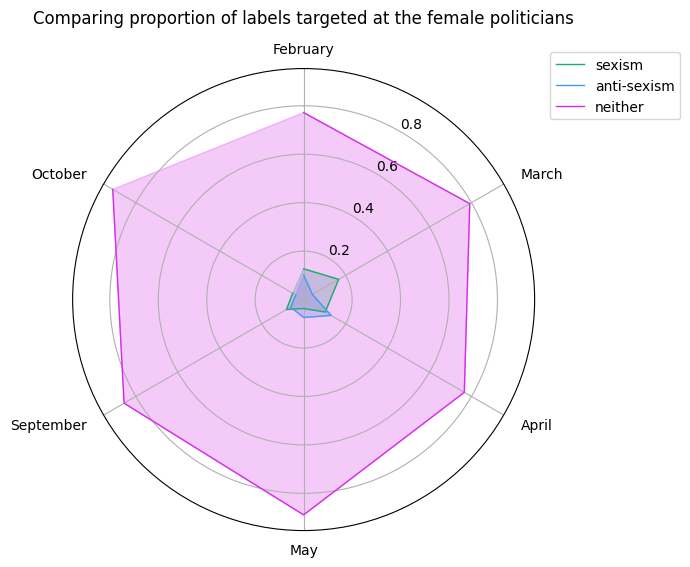

In [261]:
# Each attribute we'll plot in the radar chart.
labels = months

# Let's look at text towards Angela Rayner and the general emotion
#ar_values = final_counts.loc['AR'].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
#ar_values += ar_values[:1]
#angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


# For one of them
# Draw the outline of our data.
#ax.plot(angles, ar_values, color='red', linewidth=1)
# Fill it in.
#ax.fill(angles, ar_values, color='red', alpha=0.25)

color = ['#1aaf6c', '#429bf4', '#d42cea']
targets = ['sexism', 'anti-sexism', 'neither']

# When comparing between multiple targets
# Helper function to plot each target politician on the radar chart.
def add_to_radar(targets, color):
  values = monthly_average.loc[targets].tolist()
  #values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=targets)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('sexism', '#1aaf6c')
add_to_radar('anti-sexism', '#429bf4')
add_to_radar('neither', '#d42cea')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
#ax.set_ylim(0, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
#ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
#ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
#ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
#ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
#ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing proportion of labels targeted at the female politicians', y=1.08, x=0.5)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.33, 1.05))

#fig.savefig("../outputs/label_proportion.pdf", bbox_inches='tight')
#fig.savefig("../outputs/label_proportion.jpg")

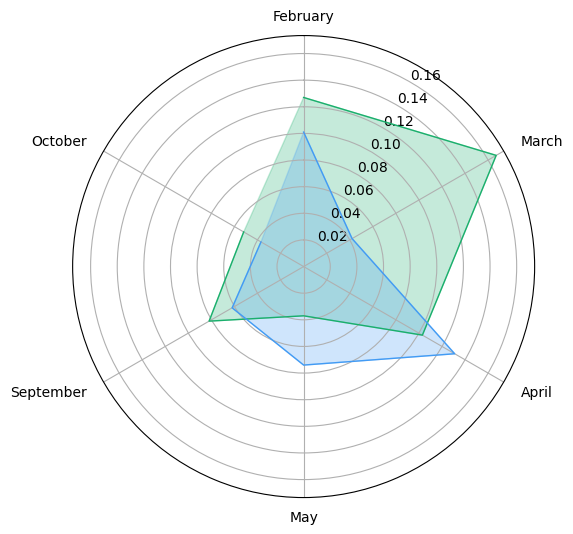

In [255]:
# Each attribute we'll plot in the radar chart.
labels = months

# Let's look at text towards Angela Rayner and the general emotion
#ar_values = final_counts.loc['AR'].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
#ar_values += ar_values[:1]
#angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


# For one of them
# Draw the outline of our data.
#ax.plot(angles, ar_values, color='red', linewidth=1)
# Fill it in.
#ax.fill(angles, ar_values, color='red', alpha=0.25)

color = ['#1aaf6c', '#429bf4', '#d42cea']
targets = ['sexism', 'anti-sexism', 'neither']

# When comparing between multiple targets
# Helper function to plot each target politician on the radar chart.
def add_to_radar(targets, color):
  values = monthly_average.loc[targets].tolist()
  #values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=targets)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('sexism', '#1aaf6c')
add_to_radar('anti-sexism', '#429bf4')
#add_to_radar('neither', '#d42cea')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
#ax.set_ylim(0, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
#ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
#ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
#ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
#ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
#ax.set_facecolor('#FAFAFA')

# Add title.
#ax.set_title('Comparing proportion of labels targeted at the female politicians', y=1.08, x=0.5)

# Add a legend as well.
#ax.legend(loc='upper right', bbox_to_anchor=(1.33, 1.05))
#fig.savefig("../outputs/sexism_proportion.pdf", bbox_inches='tight')
#fig.savefig("../outputs/sexism_proportion.jpg")

In [262]:
total_df

,uniqueID,text,label,created_at,month
0,antisexm24_uk-0,The rise of Suella Braverman is one of the gen...,sexism,2022-10-25,October
1,antisexm24_uk-1,"General Election please! 81,000 Tory members v...",neither,2022-09-06,September
2,antisexm24_uk-10,If you think you are having a tough day spare ...,neither,2022-09-06,September
3,antisexm24_uk-100,"Already it seems Liz Truss"" ""energy price free...",neither,2022-09-05,September
4,antisexm24_uk-101,@pritipatel This is not about the location of ...,neither,2022-02-26,February
...,...,...,...,...,...
784,antisexm24_uk_pilot-784,Boris Johnson visited Gigg Lane stadium today....,neither,25/04/2022,April
785,antisexm24_uk_pilot-785,@EmilyThornberry @PETAUK This at labour wonâ...,neither,25/04/2022,April
786,antisexm24_uk_pilot-786,Queen ð @AngelaRayner https://t.co/7HDiEHy3sJ,neither,25/04/2022,April
787,antisexm24_uk_pilot-787,UK Prime Minister Boris Johnson lashed out at ...,neither,25/04/2022,April


In [263]:
#total_df.to_csv('../data/prep_labeled/total_data.csv')